In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

file_path = '/content/drive/My Drive/NYT/NYT_Dataset.csv'




In [ ]:
emb_path='/content/drive/My Drive/NYT/glove.6B.300d.txt'

In [ ]:
def load_glove_embeddings(path):
    embeddings_index = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_embeddings = load_glove_embeddings(emb_path)


In [ ]:
articles = pd.read_csv(file_path)
articles = articles[['title','topic','abstract','keywords']]
articles = articles.sample(n=50000, random_state=26).reset_index()

In [ ]:
display(articles)

,index,title,topic,abstract,keywords
0,36036,Inquiry on C.I.A. Detentions to Be Unveiled,Foreign,"A United Nations investigator, whose report on...","['United Nations', 'Central Intelligence Agenc..."
1,61202,"Tony Abbott, Ousted Australian Leader, Urges E...",Foreign,"In a speech in London, Mr. Abbott offered Aust...","['Abbott, Tony', 'Immigration and Emigration',..."
2,101496,U.K. Says It Can’t Guarantee Assistance for Ci...,Foreign,Britain’s stance on the case of Nazanin Zaghar...,"['Zaghari-Ratcliffe, Nazanin', 'Iran', 'Great ..."
3,77121,"Sumiteru Taniguchi, 88, Who Survived Nagasaki ...",Foreign,Painfully wounded in the atomic bombing when h...,"['Taniguchi, Sumiteru (1929-2017)', 'Deaths (O..."
4,51808,Agreement in Northern Ireland Averts Collapse ...,Foreign,The deal addressed an austerity budget dispute...,"['Northern Ireland', 'Dalby, Douglas', 'Great ..."
...,...,...,...,...,...
49995,65418,"New Ad Promotes John Kasich, and It Makes Him ...",Politics,"The ad, from a “super PAC” backing Mr. Kasich,...","['Political Advertising', 'Presidential Electi..."
49996,88107,Store’s Bid to Shame Customers Over Plastic Ba...,Foreign,A Vancouver store introduced plastic bags with...,"['Plastic Bags', 'Supermarkets and Grocery Sto..."
49997,32665,A Melting Greenland Weighs Perils Against Pote...,Foreign,As warming temperatures are upending tradition...,"['Metals and Minerals', 'Global Warming', 'Fis..."
49998,18681,"Remembering Rabin, Some See His Legacy Fading",Foreign,"Fifteen years after his assassination, Prime M...","['Rabin, Yitzhak', 'Assassinations and Attempt..."


In [ ]:
import re
# get NLTK libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

def clean_text(text, remove_stopwords = False):
    # Simple text break
    # data cleaning

    text = re.sub("(\\t)", ' ', str(text)).lower() #remove escape charecters
    text = re.sub("(\\r)", ' ', str(text)).lower()
    text = re.sub("(\\n)", ' ', str(text)).lower()

    text = re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text = re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text = re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text = re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text = re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively

    text = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!

    text = re.sub("(mailto:)", ' ', str(text)).lower() #remove mailto:
    text = re.sub(r"(\\x9\d)", ' ', str(text)).lower() #remove \x9* in text
    text = re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(text)).lower() #replace INC nums to INC_NUM
    text = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(text)).lower() #replace CM# and CHG# to CM_NUM


    text = re.sub("(\.\s+)", ' ', str(text)).lower() #remove full stop at end of words(not between)
    text = re.sub("(\-\s+)", ' ', str(text)).lower() #remove - at end of words(not between)
    text = re.sub("(\:\s+)", ' ', str(text)).lower() #remove : at end of words(not between)

    text = re.sub("(\s+.\s+)", ' ', str(text)).lower() #remove any single charecters hanging between 2 spaces
    text = re.sub("(\s+)",' ',str(text)).lower() #remove multiple spaces

    #Sho uld always be last
    text = re.sub("(\s+.\s+)", ' ', str(text)).lower() #remove any single charecters hanging between 2 spaces

    # tokenization
    text = text.lower()
#     text = nltk.word_tokenize(text) # converts review to tokens
    return text

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()
articles['Cleaned_abstract'] = articles['abstract'].progress_apply(clean_text)
articles['Cleaned_title'] = articles['title'].progress_apply(clean_text)

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
display(articles['Cleaned_abstract'])

0        a united nations investigator whose report on ...
1        in speech in london mr abbott offered australi...
2        britain’s stance on the case of nazanin zaghar...
3        painfully wounded in the atomic bombing when h...
4        the deal addressed an austerity budget dispute...
                               ...                        
49995    the ad from “super pac” backing mr kasich show...
49996    a vancouver store introduced plastic bags with...
49997    as warming temperatures are upending tradition...
49998    fifteen years after his assassination prime mi...
49999    a german court ruled that carles puigdemont co...
Name: Cleaned_abstract, Length: 50000, dtype: object

In [ ]:
display(articles['Cleaned_title'])

0               inquiry on c.i.a detentions to be unveiled
1        tony abbott ousted australian leader urges eur...
2        u.k says it can’t guarantee assistance for cit...
3        sumiteru taniguchi 88 who survived nagasaki to...
4        agreement in northern ireland averts collapse ...
                               ...                        
49995    new ad promotes john kasich and it makes him u...
49996    store’s bid to shame customers over plastic ba...
49997    a melting greenland weighs perils against pote...
49998         remembering rabin some see his legacy fading
49999    ex-catalonia leader can be extradited but not ...
Name: Cleaned_title, Length: 50000, dtype: object

In [ ]:
from time import time
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
abstracts = [str(doc) for doc in nlp.pipe(articles['Cleaned_abstract'], batch_size=5000)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 1.73 mins


In [ ]:
abstracts[0]

'a united nations investigator whose report on the c.i.a.’s use of secret detentions and interrogation techniques is to be released called on the united states to publicly account for the policy.'

In [ ]:
t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
title = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(articles['Cleaned_title'], batch_size=5000)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.57 mins


In [ ]:
title[0]

'_START_ inquiry on c.i.a detentions to be unveiled _END_'

In [ ]:
articles['Cleaned_abstract'] = pd.Series(abstracts)
articles['Cleaned_title'] = pd.Series(title)

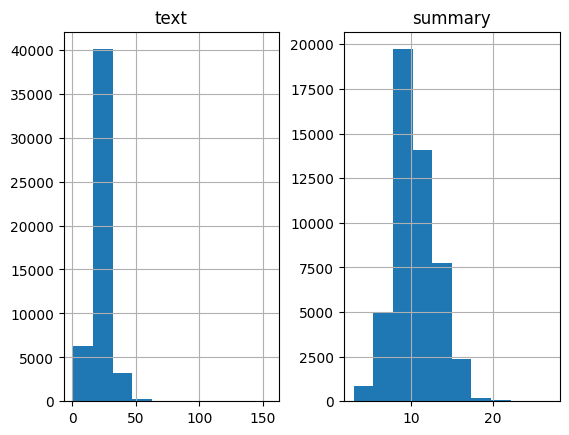

In [ ]:
import matplotlib.pyplot as plt

abstract_count = []
title_count = []

for sent in articles['Cleaned_abstract']:
    abstract_count.append(len(sent.split()))
for sent in articles['Cleaned_title']:
    title_count.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = abstract_count
graph_df['summary'] = title_count


graph_df.hist(bins = 10)
plt.show()

In [ ]:
articles['Clean_length'] = articles['Cleaned_abstract'].progress_apply(lambda x: len(x.split()))
min_len = np.min(articles['Clean_length'])
max_len = np.max(articles['Clean_length'])
avg_len = np.mean(articles['Clean_length'])
std_len = np.sqrt(np.var(articles['Clean_length']))
med_len = np.median(articles['Clean_length'])

print("Shortest Abstract", min_len)
print("Longest Abstract", max_len)
print("Median Abstract", med_len)
print("Average Abstract", avg_len)
print("Standard deviation", std_len)
print(f"Percent articles under average or {avg_len} words:", articles[articles['Clean_length'] <= (avg_len)]['Clean_length'].count()/len(articles['Clean_length']))
print(f"Percent articles under 0.5 stds or {avg_len + 0.5*std_len} words:", articles[articles['Clean_length'] <= (avg_len + 0.5*std_len)]['Clean_length'].count()/len(articles['Clean_length']))
print(f"Percent articles under 1 std or {avg_len + std_len} words:", articles[articles['Clean_length'] <= (avg_len + std_len)]['Clean_length'].count()/len(articles['Clean_length']))
print(f"Percent articles under 2 stds or {avg_len + 2*std_len} words:", articles[articles['Clean_length'] <= (avg_len + 2*std_len)]['Clean_length'].count()/len(articles['Clean_length']))

  0%|          | 0/50000 [00:00<?, ?it/s]

Shortest Abstract 1
Longest Abstract 155
Median Abstract 23.0
Average Abstract 23.41556
Standard deviation 7.121937228479341
Percent articles under average or 23.41556 words: 0.5069
Percent articles under 0.5 stds or 26.97652861423967 words: 0.7293
Percent articles under 1 std or 30.53749722847934 words: 0.90486
Percent articles under 2 stds or 37.65943445695868 words: 0.97734


In [ ]:
articles['Clean_title_length'] = articles['Cleaned_title'].progress_apply(lambda x: len(x.split()))
min_len = np.min(articles['Clean_title_length'])
max_len = np.max(articles['Clean_title_length'])
avg_len = np.mean(articles['Clean_title_length'])
std_len = np.sqrt(np.var(articles['Clean_title_length']))
med_len = np.median(articles['Clean_title_length'])

print("Shortest title", min_len)
print("Longest title", max_len)
print("Median title", med_len)
print("Average title", avg_len)
print("Standard deviation", std_len)
print(f"Percent titles under average or {avg_len} words:", articles[articles['Clean_title_length'] <= (avg_len)]['Clean_title_length'].count()/len(articles['Clean_title_length']))
print(f"Percent titles under 0.5 stds or {avg_len + 0.5*std_len} words:", articles[articles['Clean_title_length'] <= (avg_len + 0.5*std_len)]['Clean_title_length'].count()/len(articles['Clean_title_length']))
print(f"Percent titles under 1 std or {avg_len + std_len} words:", articles[articles['Clean_title_length'] <= (avg_len + std_len)]['Clean_title_length'].count()/len(articles['Clean_title_length']))
print(f"Percent titles under 2 stds or {avg_len + 2*std_len} words:", articles[articles['Clean_title_length'] <= (avg_len + 2*std_len)]['Clean_title_length'].count()/len(articles['Clean_title_length']))

  0%|          | 0/50000 [00:00<?, ?it/s]

Shortest title 3
Longest title 27
Median title 10.0
Average title 10.48706
Standard deviation 2.4982939291444475
Percent titles under average or 10.48706 words: 0.51114
Percent titles under 0.5 stds or 11.736206964572224 words: 0.6609
Percent titles under 1 std or 12.985353929144447 words: 0.7928
Percent titles under 2 stds or 15.483647858288894 words: 0.97798


In [ ]:
max_abstract_length = 35
max_title_length = 15

In [ ]:
#Select the Summaries and Text between max len defined above

cleaned_abstracts = np.array(articles['Cleaned_abstract'])
cleaned_titles = np.array(articles['Cleaned_title'])

shortened_abstract=[]
shortened_titles=[]

for i in range(len(cleaned_abstracts)):
    if(len(cleaned_abstracts[i].split())<=max_abstract_length and len(cleaned_titles[i].split())<=max_title_length):
        shortened_abstract.append(cleaned_abstracts[i])
        shortened_titles.append(cleaned_titles[i])

processed_articles=pd.DataFrame({'Abstract':shortened_abstract,'Title':shortened_titles})
display(processed_articles.head(2))
processed_articles['Title'] = processed_articles['Title'].progress_apply(lambda x : 'sostok '+ x + ' eostok')
display(processed_articles.head(2))

,Abstract,Title
0,a united nations investigator whose report on ...,_START_ inquiry on c.i.a detentions to be unve...
1,in speech in london mr abbott offered australi...,_START_ tony abbott ousted australian leader u...


  0%|          | 0/47560 [00:00<?, ?it/s]

,Abstract,Title
0,a united nations investigator whose report on ...,sostok _START_ inquiry on c.i.a detentions to ...
1,in speech in london mr abbott offered australi...,sostok _START_ tony abbott ousted australian l...


In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(processed_articles['Abstract']),np.array(processed_articles['Title']),test_size=0.1,random_state=26,shuffle=True)

In [ ]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh=2

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 43.72900625290683
Total Coverage of rare words: 1.71964257771618


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr)
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_abstract_length, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_abstract_length, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 21779


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
thresh=2

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 45.13196009011908
Total Coverage of rare words: 2.091002797820645


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_title_length, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_title_length, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 13639


In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
embedding_dim = 300  # Dimensionality of GloVe vectors

def create_embedding_matrix(tokenizer, embeddings_index, embedding_dim):
    vocabulary_size = len(tokenizer.word_index) + 1  # Including padding token
    embedding_matrix = np.zeros((vocabulary_size, embedding_dim))
    for word, index in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
    return embedding_matrix

# Assuming you have a tokenizer named `y_tokenizer` set up
embedding_matrix = create_embedding_matrix(y_tokenizer, glove_embeddings, 300)


In [ ]:
from keras import backend as K
import gensim
from numpy import *
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=300
# Using a tokenizer object that might be a Tokenizer from Keras


encoder_inputs = Input(shape=(max_abstract_length,))
enc_emb = Embedding(input_dim=len(y_tokenizer.word_index) + 1, output_dim=300, weights=[embedding_matrix], trainable=True)(encoder_inputs)


#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

# Decoder

dec_emb = Embedding(input_dim=len(y_tokenizer.word_index) + 1, output_dim=300, weights=[embedding_matrix], trainable=True)(decoder_inputs)


decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 21779


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 35)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 35, 300)              7457100   ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 35, 300),            721200    ['embedding[0][0]']           
                              (None, 300),                                                        
                              (None, 300)]                                                        
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
335/335 [==============================] - 194s 528ms/step - loss: 4.8714 - val_loss: 4.3787
Epoch 2/50
335/335 [==============================] - 151s 450ms/step - loss: 4.3916 - val_loss: 4.2369
Epoch 3/50
335/335 [==============================] - 149s 445ms/step - loss: 4.2666 - val_loss: 4.1258
Epoch 4/50
335/335 [==============================] - 150s 448ms/step - loss: 4.1733 - val_loss: 4.0507
Epoch 5/50
335/335 [==============================] - 148s 443ms/step - loss: 4.0923 - val_loss: 3.9850
Epoch 6/50
335/335 [==============================] - 151s 452ms/step - loss: 4.0234 - val_loss: 3.9393
Epoch 7/50
335/335 [==============================] - 147s 438ms/step - loss: 3.9639 - val_loss: 3.8853
Epoch 8/50
335/335 [==============================] - 148s 443ms/step - loss: 3.9112 - val_loss: 3.8406
Epoch 9/50
335/335 [==============================] - 153s 456ms/step - loss: 3.8644 - val_loss: 3.8134
Epoch 10/50
335/335 [==============================] - 162s 483m

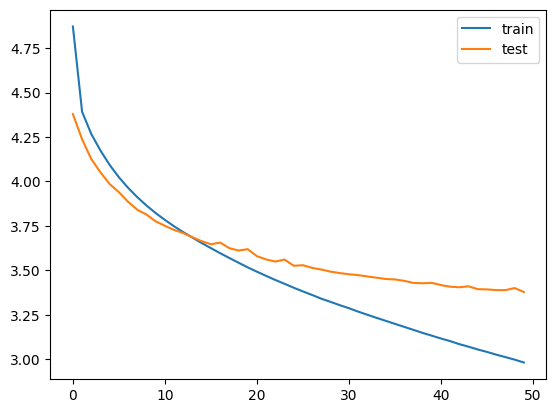

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_abstract_length,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= Embedding(input_dim=len(y_tokenizer.word_index) + 1, output_dim=300, weights=[embedding_matrix], trainable=True)(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_title_length-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2title(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2abstract(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,100):
    print("Abstract:",seq2abstract(x_tr[i]))
    print("Original Title:",seq2title(y_tr[i]))
    print("Predicted Title:",decode_sequence(x_tr[i].reshape(1,max_abstract_length)))
    print("\n")

Abstract: swamped with homicides investigators cope with too little expertise and too much corruption and they are targets themselves 
Original Title: start in mexican drug war investigators are fearful end 
1/1 [==============================] - 0s 24ms/step
Predicted Title:  in the of of of of of of of of of of end end


Abstract: here are some likely contenders according to allies and advisers of the clintons and prominent democrats and look at their strengths and weaknesses 
Original Title: start who might hillary clinton running mate be if she the nominee end 
1/1 [==============================] - 0s 26ms/step
Predicted Title:  health care and the the democratic are the the democratic races end


Abstract: the trial of the iraqi journalist who threw his shoes at president george bush was adjourned until march 12 muntader al zaidi has been incarcerated since dec 14 
Original Title: start trial of iraqi ‘shoe thrower’ is end 
1/1 [==============================] - 0s 33ms/step
Pred